In [1]:
%load_ext autoreload
%autoreload 2

In [2]:


from cr39py.track_overlap_mc import MonteCarloTrackOverlap
import numpy as np
import matplotlib.pyplot as plt

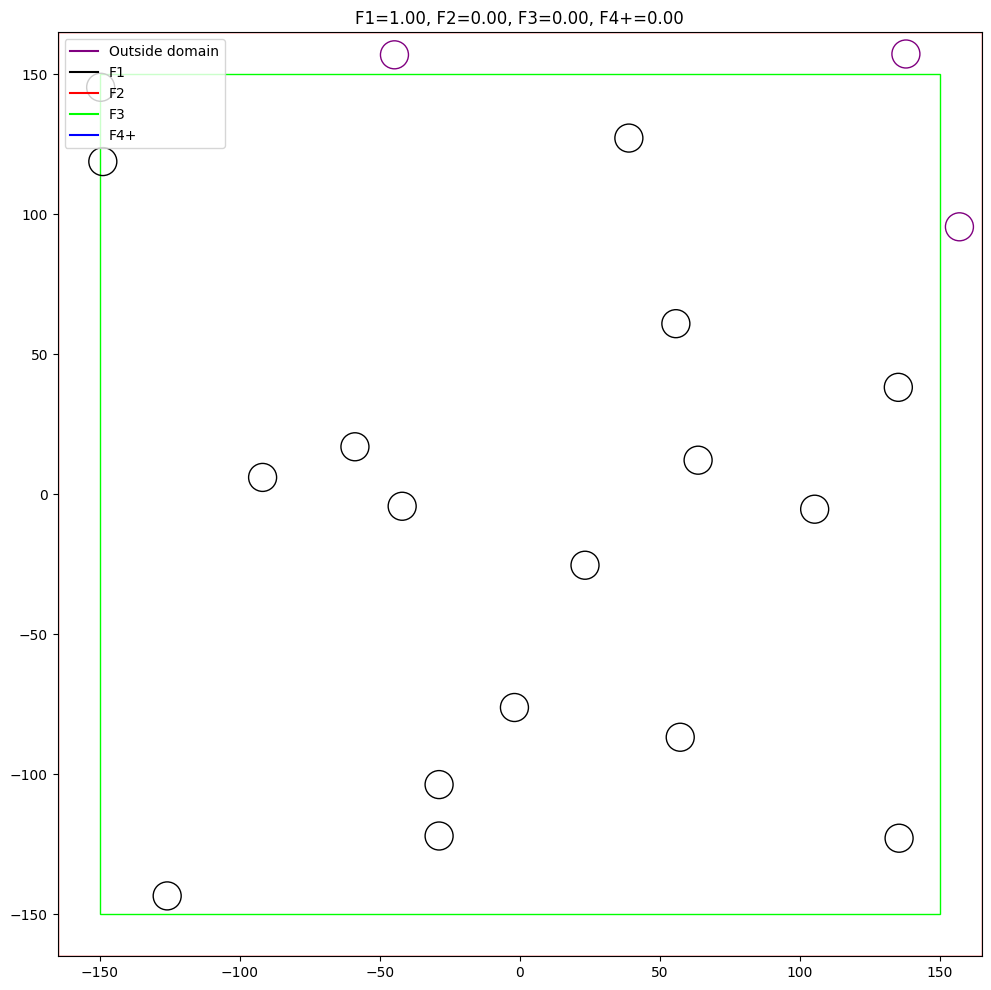

In [3]:
mc = MonteCarloTrackOverlap()
mc.framesize=150
mc.diameters_mean=10
mc.diameters_std=0
mc.border=15
xyd = mc.draw_tracks(20)
mc.plot_tracks(xyd)

Farr = mc.compute_overlaps(xyd)

Trying to reprroduce this figure from Alex's paper

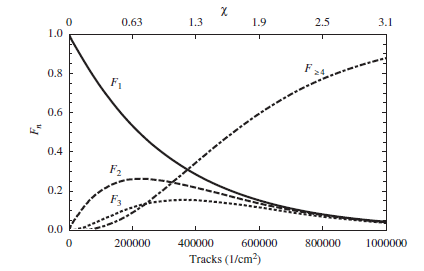

In [44]:
mc = MonteCarloTrackOverlap(framesize=300, diameters_mean=10, diameters_std=0, border=15)
#track_densities = np.arange(1, 1e6+1e4, 1e4) # tracks/cm^2
track_densities = np.logspace(3, 6.5, num=30)
print(track_densities)
chi = track_densities * np.pi * (mc.diameters_mean * 1e-4)**2
Farr = mc.run_curve(track_densities, 100)
# Set the first value explicitly: it can be wrong if the one track goes in a border region
Farr[:,0] = 1,0,0,0


[1.00000000e+03 1.32035178e+03 1.74332882e+03 2.30180731e+03
 3.03919538e+03 4.01280703e+03 5.29831691e+03 6.99564216e+03
 9.23670857e+03 1.21957046e+04 1.61026203e+04 2.12611233e+04
 2.80721620e+04 3.70651291e+04 4.89390092e+04 6.46167079e+04
 8.53167852e+04 1.12648169e+05 1.48735211e+05 1.96382800e+05
 2.59294380e+05 3.42359796e+05 4.52035366e+05 5.96845700e+05
 7.88046282e+05 1.04049831e+06 1.37382380e+06 1.81393069e+06
 2.39502662e+06 3.16227766e+06]


Running track density curve:  97%|█████████▋| 29/30 [01:28<00:16, 16.83s/it]

I think the problem is that Alex's code identifies a series of three interlocking tracks as a 'cluster of 3' and records that as F=3 while I see it as 'three tracks each with F=2'. I'm not sure this really matters much: what really matters is F1...

(4, 101)
0.05710066203635189


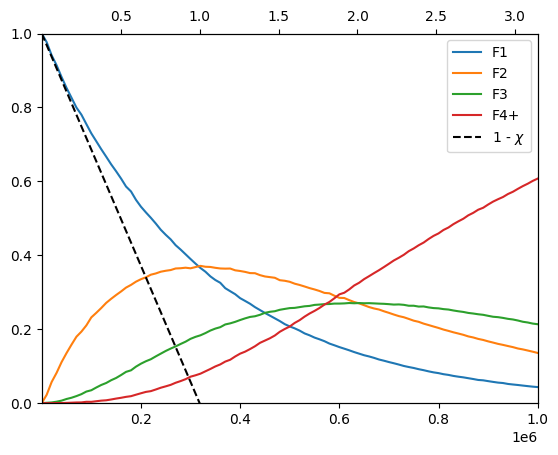

In [35]:
fig, ax = plt.subplots()
ax.set_ylim(0,1)
ax.set_xlim(np.min(track_densities), np.max(track_densities))

print(Farr.shape)
ind = np.argmin(np.abs(track_densities - 2.5e4))
print(Farr[1,ind])

for i,lbl in enumerate(['F1', "F2", "F3", "F4+"]):
    ax.plot(track_densities, Farr[i, :], label=lbl)
    
ax.plot(track_densities, 1-chi, linestyle='dashed', color='black', label='1 - $\chi$')
    
    
ax2 = ax.twiny()
ax2.set_xlim(np.min(chi), np.max(chi))

ax.legend(loc='upper right')

(0.0, 1.0)

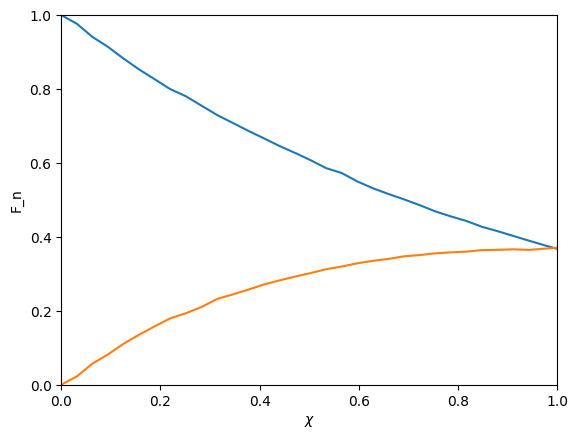

In [37]:
fig, ax = plt.subplots()
ax.plot(chi, Farr[0,:], label='F1')
ax.plot(chi, Farr[1,:], label='F2')
ax.set_xlabel('$\chi$')
ax.set_ylabel('F_n')
ax.set_xlim(0,1)
ax.set_ylim(0,1)

In [34]:
# Write to text
header = ['$\chi$', 'F1', 'F2', 'F3', 'F4+']
arr = np.empty((Farr.shape[0]+1, Farr.shape[1]))
arr[0,:] = chi
arr[1:, :] = Farr
np.savetxt('F1-F4+.txt', arr.T, header='\t'.join(header), fmt='%.4e', delimiter='\t')
